In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm 
import numpy as np

In [2]:
# Read in cleaned US dataframe
US = pd.read_csv('../data/us_rep_elections.csv')

In [3]:
US

,name,raised,spent,state,district,party,incumbent,winner
0,Jerry Carl,1971321,1859349,AL,1,R,False,True
1,James Averhart,80095,78973,AL,1,D,False,False
2,Barry Moore,650807,669368,AL,2,R,False,True
3,Phyllis Harvey-Hall,56050,55988,AL,2,D,False,False
4,Mike D Rogers,1193111,1218564,AL,3,D,True,True
...,...,...,...,...,...,...,...,...
889,Tricia Zunker,1261957,1232690,WI,7,D,False,False
890,Mike Gallagher,3202905,2841801,WI,8,R,True,True
891,Amanda Stuck,416978,399916,WI,8,D,False,False
892,Liz Cheney,3003883,3060167,WY,1,R,True,True


# Problem 4c
Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?

In [4]:
# Build a Logistic regression model with target variable equal to if a candidate won the race or not, 
# predictor variable will be money raised
raised_model = (sm.GLM(endog = US['winner'],
                       exog = sm.add_constant(US[['raised']]),
                       family = sm.families.Binomial())
                .fit())

print(raised_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 winner   No. Observations:                  894
Model:                            GLM   Df Residuals:                      892
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.13
Date:                Thu, 21 Oct 2021   Deviance:                       1134.3
Time:                        21:24:11   Pearson chi2:                 1.03e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6842      0.096     -7.147      0.0

In [5]:
# Build a Logistic regression model with target variable equal to if a candidate won the race or not, 
# predictor variable will be money spent
spent_model = (sm.GLM(endog = US['winner'],
                      exog = sm.add_constant(US[['spent']]),
                      family = sm.families.Binomial())
               .fit())

print(spent_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 winner   No. Observations:                  894
Model:                            GLM   Df Residuals:                      892
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -581.63
Date:                Thu, 21 Oct 2021   Deviance:                       1163.3
Time:                        21:24:11   Pearson chi2:                     955.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5552      0.091     -6.076      0.0

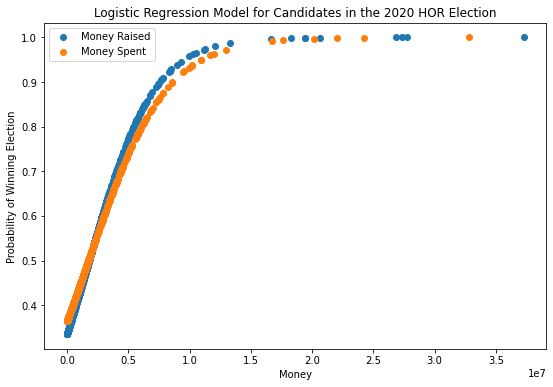

In [6]:
# Plot Logistic regression model results from previous cells
plt.subplots(figsize=(9,6))

x_raised = US['raised']
y_raised = 1 / (1 + (np.exp(-raised_model.params[0] - (raised_model.params[1]*x_raised))))
plt.scatter(x_raised, y_raised)

x_spent = US['spent']
y_spent = 1 / (1 + (np.exp(-spent_model.params[0] - (spent_model.params[1]*x_spent))))
plt.scatter(x_spent, y_spent)

plt.xlabel("Money")
plt.ylabel("Probability of Winning Election")
plt.title("Logistic Regression Model for Candidates in the 2020 HOR Election")
plt.legend(['Money Raised', 'Money Spent']);

Our models show us that as candidates raise and spend more money the probability of the candidate winning the race increases. From our results, it would seem that money raised and money spent are equally useful in predicting if a candidate will win their election or not.